# Experimento 01
---
Ejemplo de los modelos clásicos de epidemias, los modelos de movimiento y los modelos epidémicos con metapoblaciones. En este `notebook` se utiliza `solve_ivp` del módulo `scipy.integrate`, para resolver numéricamente estos sistemas de ecuaciones diferenciales.

In [1]:
# Para ubicar ruta en /MetapopulationEpidemicModels

import os
os.chdir("..")
os.chdir("..")

# IMPORTANTE!!! Solo correr UNA vez.

In [2]:
from IPython.display import SVG, display
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import models.numba_models as nm
import models.clasic_epidemic_models as cem
import models.mov_models as mm

## Modelos Epidémicos Clásicos


### Modelo SIR

En este modelo se consideran $3$ clases compartimentales: *Susceptibles*, *Infestados* y *Recuperados*.

$$
\begin{align*}
    \dot{S} & = - \beta S I \\ 
    \dot{I} & =   \beta S I - \gamma I \\
    \dot{R} & =   \gamma I
\end{align*}
$$
donde $\beta$ es la tasa de transmisión de la enfermedad y $\gamma$ la tasa de recuperación que es lo mismo que $1/D$ siendo $D$ el número de días promedio que dura la enfermedad en un individuo. Además $\beta = \frac{\kappa \delta}{N}$ donde $N$ es el tamaño de la población, $\kappa$ es la cantidad de contactos por unidad de tiempo y $\delta$ es la probabilidad de contraer la enfermedad al hacer contacto con un portador de esta; este también es conocido como la transmisiblidad de la enfermedad. De esta manera para diferentes valores de $\kappa$ y $\delta$ se puede obtener el mismo modelo.

Consideremos los parámetros $\beta = 0,000012$ y $\gamma = 1/6$, y los valores iniciales $S(t_0) = 49 000 $, $ I(t_0) = 1 $, y $ R(t_0) = 0 $. Note que en este caso los parámetros $\kappa$ y $\delta$ pudieran tener los siguiente valores, y tendríamos el mismo modelo:

| $\kappa$ | $\delta$ |   
|----------|---------|  
| 2        |    0.3  |
| 3        |    0.2  |
| 4        |    0.15 |  
| 4.5      | 0.13333 |  
| 5        |    0.12 |  
| 6        |    0.10 |  

Finalmente de la resolución del modelo se obtiene:

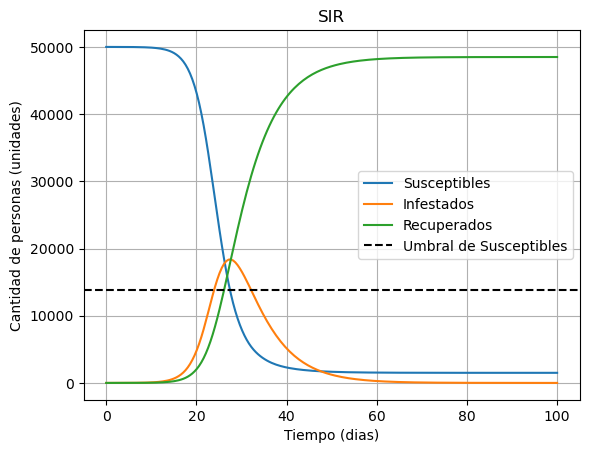

In [3]:
Beta = 4 * 0.15 / 50000
Gamma = 1/6
sir = cem.SIR_Model()
sir.set_params([Beta, Gamma])
sir.set_initial_value(0, np.array([50000-1,1,0]))
sir.solve((0,100), np.linspace(0,100,200))
sir.plot_result(show=False)
sir.plot_result('umbral')

### Modelo SIS

En este modelo se consideran $2$ clases compartimentales: *Susceptibles* e *Infestados*.

$$
\begin{align*}
    \dot{S} & = - \beta S I + \gamma I \\ 
    \dot{I} & =   \beta S I - \gamma I \\
\end{align*}
$$
Consideremos los parámetros $\beta = 0,000012$ y $\gamma = 1/6$, y los valores iniciales $S(t_0) = 49 000 $ y $ I(t_0) = 1 $, el comportamiento del modelo resulta ser:

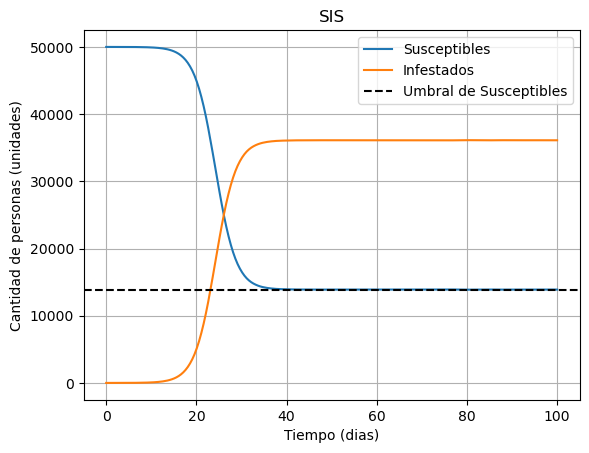

In [4]:
Beta = 4 * 0.15 / 50000
Gamma = 1/6
sis = cem.SIS_Model()
sis.set_params([Beta, Gamma])
sis.set_initial_value(0, np.array([50000-1,1]))
sis.solve((0,100), np.linspace(0,100,200))
sis.plot_result(show=False)
sis.plot_result('umbral')

### Modelo SEIR

En este modelo se consideran $4$ clases compartimentales: *Susceptibles*, *Expuestos*, *Infestados* y *Recuperados*.

$$
\begin{align*}
    \dot{S} & = - \beta S I \\ 
    \dot{E} & =   \beta S I - \sigma E \\
    \dot{I} & =   \sigma E - \gamma I \\
    \dot{R} & =   \gamma I
\end{align*}
$$
Consideremos los parámetros $\beta = 0,000012$, $\sigma = 1/3$ y $\gamma = 1/6$, y los valores iniciales $S(t_0) = 49 000 $, $E(t_0) = 1$, $ I(t_0) = 0 $, y $ R(t_0) = 0 $, el comportamiento del modelo resulta ser:

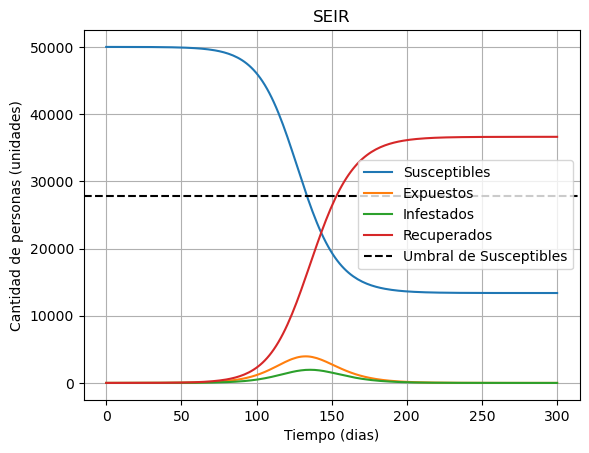

In [5]:
Beta = 4 * 0.15 / 50000
Sigma = 1/3
Gamma = 1/6
sis = cem.SEIR_Model()
sis.set_params([Beta, Sigma, Gamma])
sis.set_initial_value(0, np.array([50000-1,1,0,0]))
sis.solve((0,300), np.linspace(0,300,200))
sis.plot_result(show=False)
sis.plot_result('umbral')

## Modelos de Movimiento poblacional

### Modelo Euleriano
Este modelo considera que las personas se trasladan de una localización a otra por un tiempo indefinido. Para ello se consideran:
- $K$: regiones o localizaciones
- $N_i$: cantidad de habitantes de la localidad $i$
- $F_{ij}$: tasa de migración de la localidad $i$ a la $j$, $f_{ii} = 0, \forall i = 1,...,K$

El modelo quedaría:
$$
\begin{align*}
    \dot{N_i} & = - \sum_{j=1}^K f_{ij} N_i + \sum_{j=1}^K f_{ji} N_j , \qquad \forall i = 1,...,K
\end{align*}
$$
con $K$ ecuaciones y $K(K-1)$ parámetros. Utilizando $3$ nodos

In [66]:
F = np.array([[0.        , 0.26841269, 0.28856755],
              [0.01966866, 0.        , 0.12332699],
              [0.0565096, 0.02810482, 0.        ]])*0.22
y0 = np.array([4884., 2361., 2328.])

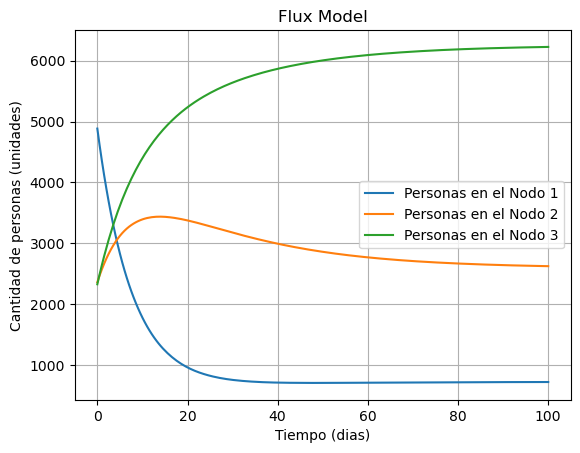

In [68]:
euler = mm.FLUX_Model()
euler.set_params(F)
euler.set_initial_value(0,y0)
euler.solve((0,100), t_eval=np.linspace(0,100,200))
euler.plot_result()

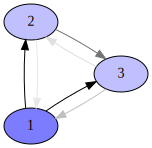

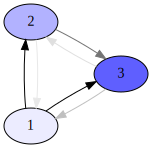

IndexError: index 200 is out of bounds for axis 1 with size 200

In [71]:
for i in [0,5,10,15,20,40,80]:
    G = euler.generate_graph_population_pydot([str(f'{j+1}') for j in range(3)], euler._result.y[:,i], edge_alpha=20, edge_len=0.3)
    svg = G.create_svg()
    display(SVG(svg))

### Modelo Lagrangiano
Este modelo considera que las personas se trasladan de una localización a otra por un tiempo indefinido. Para ello se consideran:
- $K$: regiones o localizaciones
- $N_{ij}$: cantidad de habitantes de la localidad $i$ que se encuentran en $j$
- $\phi_{ij}$: tasa de migración de la localidad $i$ a la $j$, $\phi_{ii} = 0, \forall i = 1,...,K$
- $\tau_{ij}$: tasa de migración de la localidad $i$ que están en $j$ y regresan $i$, $\tau_{ii} = 0, \forall i = 1,...,K$

El modelo quedaría:
$$
\begin{align*}
    \dot{N_{ii}} & = - \sum_{j=1}^K \phi_{ij} N_{ii} + \sum_{j=1}^K \tau_{ij} N_{ij} , \qquad \forall i = 1,...,K \\
    \dot{N_{ij}} & = - \tau_{ij} N_{ij} + \phi_{ij} N_{ii} , \qquad \forall i,j = 1,...,K \quad (i \ne j)
\end{align*}
$$
con $K^2$ ecuaciones y $2K(K-1)$ parámetros. Utilizando $3$ nodos.

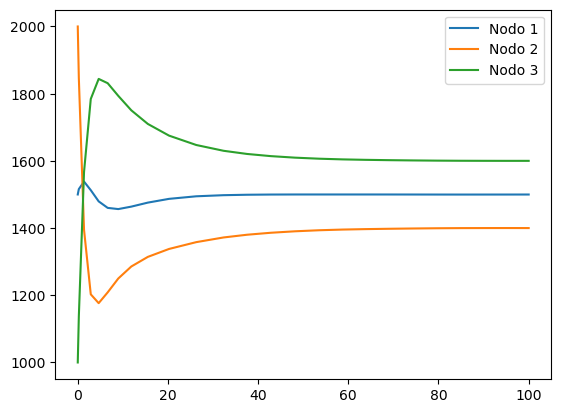

In [24]:
Out = np.array([
    [0, 0.1, 0.2],
    [0.2, 0, 0.3],
    [0.13, 0.14, 0]
])
In = 0.5 * Out
y0 = np.diag([1500, 2000, 1000])
#y0 = np.array([1500, 2000, 1000])
y0 = y0.flatten()
fun_lagrange = om.fun_lagrange_mov(Out,In)
sol_05 = solve_ivp(fun_lagrange, (0,100), y0)
clases = ['Nodo 1','Nodo 2','Nodo 3']
for i in range(3):
    plt.plot(sol_05.t, sol_05.y[[i, 3+i, 6+i]].sum(axis=0), label = clases[i])
plt.legend()
plt.show()

In [6]:
from numba import njit
from scipy.integrate import solve_ivp

@njit
def fun_sir_lagrange(t,y, Out, In, Beta, Gamma):

    K = Out.shape[0]
    Out_i_k = Out.sum(axis=1)

    y = y.reshape((4,K,K))
    I_k_i = y[1].sum(axis=0)
    N_k_i = y[3].sum(axis=0)
    new_y = np.zeros((4,K,K))
    for i in range(K):
        for j in range(K):
            if i == j:
                new_y[0,i,i] = - Beta[i] * y[0,i,i] * I_k_i[i] / N_k_i[i] - \
                                y[0,i,i] * Out_i_k[i] + (In[i,] * y[0,i]).sum()
                new_y[1,i,i] =   Beta[i] * y[0,i,i] * I_k_i[i] / N_k_i[i] - Gamma[i] * y[1,i,i] - \
                                y[1,i,i] * Out_i_k[i] + (In[i,] * y[1,i]).sum()
                new_y[2,i,i] =   Gamma[i] * y[1,i,i] - \
                                y[2,i,i] * Out_i_k[i] + (In[i,] * y[2,i]).sum()
                new_y[3,i,i] = - y[3,i,i] * Out_i_k[i] + (In[i,] * y[3,i]).sum()
            else:
                new_y[0,i,j] = - Beta[j] * y[0,i,j] * I_k_i[j] / N_k_i[j] - \
                                In[i,j] * y[0,i,j] + Out[i,j] * y[0,i,i]
                new_y[1,i,j] =   Beta[j] * y[0,i,j] * I_k_i[j] / N_k_i[j] - Gamma[j] * y[1,i,j] - \
                                In[i,j] * y[1,i,j] + Out[i,j] * y[1,i,i]
                new_y[2,i,j] =   Gamma[j] * y[1,i,j] - \
                                In[i,j] * y[2,i,j] + Out[i,j] * y[2,i,i]
                new_y[3,i,j] = - In[i,j] * y[3,i,j] + Out[i,j] * y[3,i,i]
    new_y = new_y.reshape((4*K*K,))
    return new_y

def GenerateRandomMatrix(n, m, max= None):    
    if max is None:
        max = np.random.random(n)

    r = np.zeros((n,m))
    for i in range(n):
        r[i] = np.sort(np.random.uniform(0,max[i], m))
    a = np.zeros((n,m))
    a[:,:m-1] = r[:,1:m]
    a[:,m-1] = max
    return a - r

def GenerateParams_SIR_LAGRANGE(K, in_mode= 'rand', a= 1):

    Out = GenerateRandomMatrix(K,K)
    np.fill_diagonal(Out,0)

    if in_mode == 'alpha-rand':
        In = np.random.random() * Out
    elif in_mode == 'alpha-const':
        In = a * Out
    elif in_mode == 'rand':
        In = np.random.random((K,K))
        np.fill_diagonal(In,0)
    elif in_mode == 'const':
        In = np.zeros((K,K)) + a
    else:
        raise Exception('Modo incorrecto')
        
    Beta = np.random.rand(K)
    Gamma = np.random.rand(K)

    return Out, In, Beta, Gamma

def GenerateY0_SIR_LAGRANGE(K):
    y0 = np.zeros((4,K,K))
    np.fill_diagonal(y0[3], 2000)
    np.fill_diagonal(y0[1], 1)
    y0[0] = y0[3] - y0[1]
    y0.resize((4*K*K,))
    return y0

In [7]:
Out = np.array([
    [0, 0, 0, 0.7],
    [0, 0, 0, 0.6],
    [0, 0, 0, 0.8],
    [0.05, 0.03, 0.01, 0],
])
In = np.array([
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [1, 1, 1, 0],
])
y0 = np.zeros((4,4,4))
np.fill_diagonal(y0[3], [2000,1000,1500,7000])
np.fill_diagonal(y0[1], [0,1,0,0])
y0[0] = y0[3] - y0[1]
y0.resize((4*4*4,))
Beta = np.random.random((4))
Beta = np.array([0.07,0.005,0.4,0.02])
Gamma = np.zeros(4) + 1/14


In [8]:
n = 200
y= np.reshape(solve_ivp(fun_sir_lagrange, (0, n), y0, args=(Out, In, Beta, Gamma), t_eval=np.linspace(1,n,n)).y, (4,4,4,n))
Beta

array([0.07 , 0.005, 0.4  , 0.02 ])

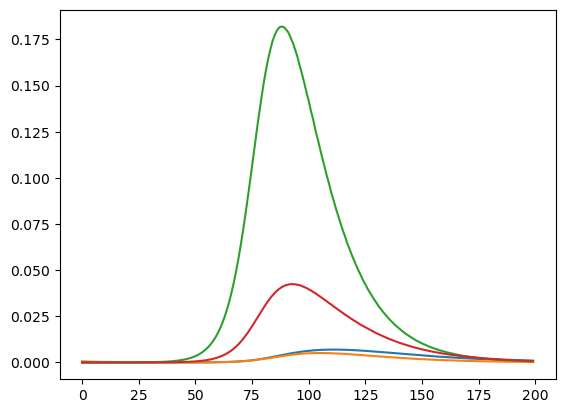

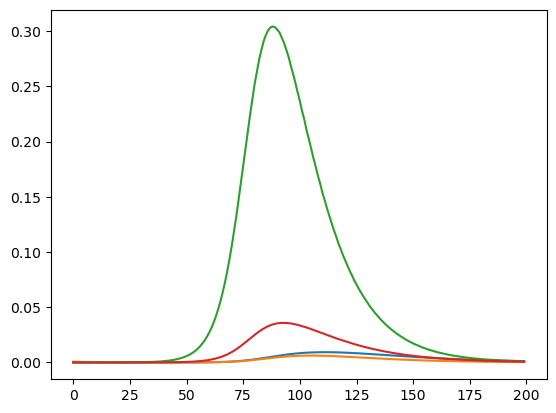

In [9]:
plt.plot([[i]*4 for i in range(n)], [y[1,0:4,0:4,i].sum(axis=0) / y[3].sum(axis=1)[:,i] for i in range(n)])
plt.show()
plt.plot([[i]*4 for i in range(n)], [y[1,0:4,0:4,i].sum(axis=0) / y[3].sum(axis=0)[:,i] for i in range(n)])
plt.show()

In [11]:
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

warnings.filterwarnings("ignore")

[0, 1, 2, 3]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[2000. 1000. 1500. 7000.]
[2.29393734e-04 9.34634968e-01 1.95353361e-04 3.32704151e-03]
[2.29393734e-04 9.34634968e-01 1.95353361e-04 3.32704151e-03]
[7.74840644e-04 8.72796297e-01 6.90555159e-04 8.39340006e-03]
[0.00136508 0.81490888 0.00131557 0.01322483]
[0.00192993 0.76083261 0.00204772 0.01754182]
[0.00245793 0.71034115 0.00290015 0.02133559]
[0.00294806 0.66320362 0.00389261 0.0246432 ]
[0.00340232 0.61919796 0.00504911 0.02751439]
[0.00382204 0.57811711 0.00639733 0.02999277]
[0.00421076 0.53976498 0.00797242 0.0321288 ]
[0.00456681 0.50396342 0.00980713 0.03395016]
[0.00489535 0.47054005 0.01195291 0.03550744]
[0.00519622 0.43933842 0.01445851 0.03683053]
[0.00547214 0.41021028 0.01738832 0.03795722]
[0.00572488 0.38301806 0.02081602 0.03892089]
[0.00595598 0.35763345 0.02482562 0.03975322]
[0.00616792 0.33393625 0.0295215  0.04048873]
[0.00636213 0.3118149  0.03501856 0.04115752]
[0.00654118 0.29116475 0.04145997 0.

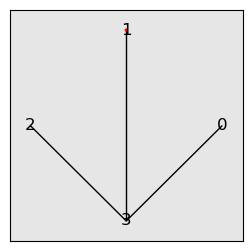

In [18]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3])
# Nodos y vonexiones
G.add_edges_from(
    [(i,j) for i in range(4) for j in range(4) if Out[i,j] > 0] +
    [(j,i) for i in range(4) for j in range(4) if In[i,j] > 0]
)
G.edges(data=True)
print(G.nodes)

pos = nx.circular_layout(G)
fig, ax = plt.subplots(figsize=(3,3))

colors = np.zeros((4,3)) + 1
print(colors)
ax.set_facecolor([0.9,0.9,0.9])
N_k_i = y0.reshape((4,4,4))[3].sum(axis=0)
print(N_k_i)

def update(i):
    new_colors = colors.copy()
    
    new_colors[:,2] = new_colors[:,1] = y[1,0:4,0:4,i].sum(axis=0) / y[3].sum(axis=0)[:,i]
    #new_colors = 1 / new_colors
    print(y[1,0:4,0:4,i].sum(axis=1))
    ax.clear()
    ax.plot()
    nx.draw_networkx(G, pos=pos, node_color="red", node_size= 2* y[1,0:4,0:4,i].sum(axis=1), ax=ax, with_labels=True, edgelist=G.edges, edge_color="black")
    #nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, edge_color="blue", ax=ax)

     
anim = animation.FuncAnimation(fig, update, frames = n)
anim.save('linechart.gif', fps=40)

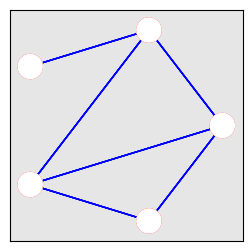

In [66]:
# Creacion del grafo
G = nx.Graph()

# Nodos y vonexiones
G.add_edges_from(
    [(1, 2),
    (2, 3),
    (1, 4),
    (1, 5),
    (4, 2),
    (5, 4)]
)
G.edges(data=True)
G.is_directed()
[a for a in G.edges(data=True)]

pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(3,3))


colors = [
    [[1,1,1]]*5,
    [[1,0.5,0.5]]*5,
    [[1,0.3,0.3]]*5
]
ax.set_facecolor([0.9,0.9,0.9])

def update(i):
    nx.draw_networkx_nodes(G, pos=pos, node_color=colors[i], ax=ax, alpha=1)
    nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, edge_color="blue", ax=ax)

num_frames = len(colors)        
anim = animation.FuncAnimation(fig, update, frames = num_frames)
anim.save('linechart.gif', fps=30)

In [24]:
[[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]